In [18]:
!pip install pandas
!pip install pandas-profiling


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import collections


In [19]:
train_path = "bank-additional-full.csv"
train_df = pd.read_csv(train_path, sep=';')

In [20]:
test_path = "bank-additional.csv"
test_df = pd.read_csv(test_path, sep=';')

In [21]:
test_df.y.value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [22]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [23]:
train_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0.5, 1.0, 'Find Correlation')

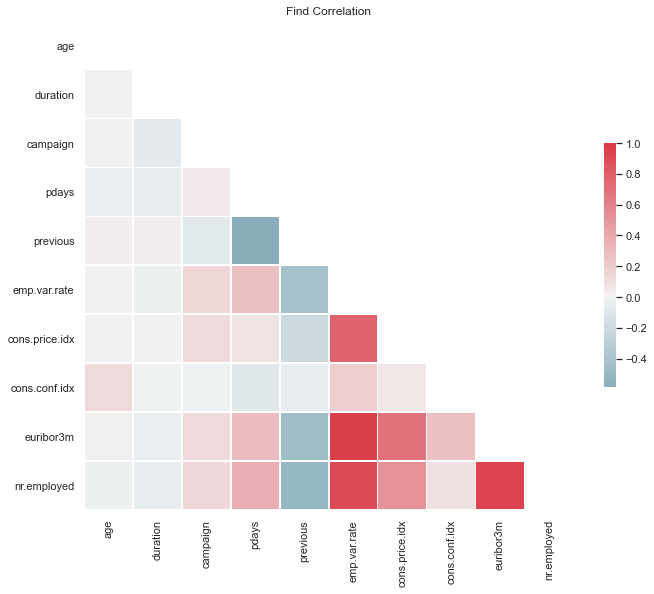

In [24]:
sns.set(style="white")

# Create a covariance matrix
corr = train_df.corr()

# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Find Correlation')
#plt.savefig('correlation.png')

In [25]:
# Separate data by target label
pos_df = train_df[train_df['y'] == 'yes']
neg_df = train_df[train_df['y'] == 'no']

### Compare Age Distribution

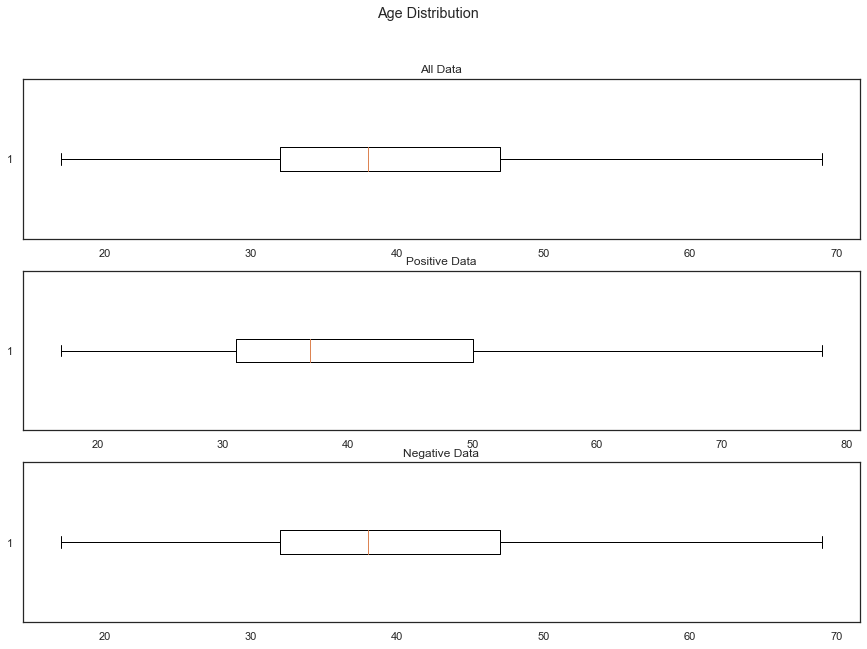

In [29]:
# Compare age distribution
"""
print(train_df.age.describe())
print(pos_data.age.describe())
print(neg_data.age.descirbe())
"""

# Visualize data
fig, axs = plt.subplots(3, figsize=(15,10))


axs[0].boxplot(train_df.age, showfliers=False, vert=False)
axs[0].set_title('All Data')

axs[1].boxplot(pos_df.age, showfliers=False, vert=False)
axs[1].set_title('Positive Data')

axs[2].boxplot(neg_df.age, showfliers=False, vert=False)
axs[2].set_title('Negative Data')


fig.suptitle('Age Distribution')


plt.show()

### Compare Job Distribution

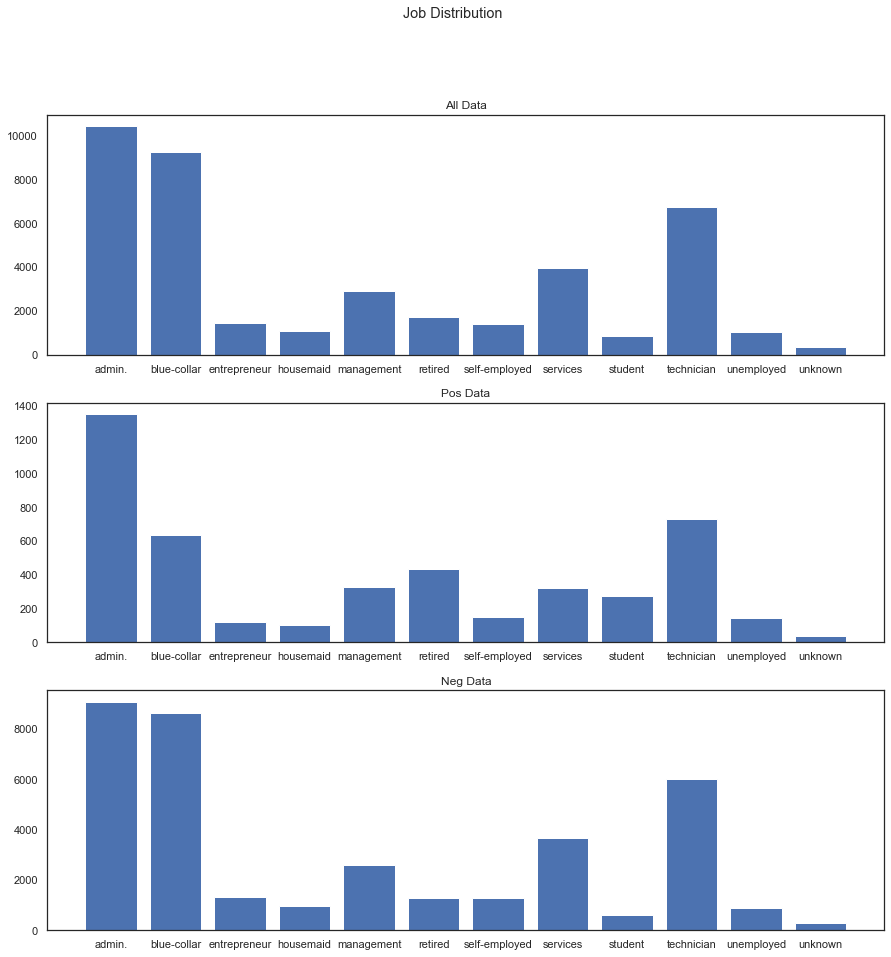

In [30]:

# Create counts for each job type
all_job = dict(train_df.job.value_counts())
all_job = collections.OrderedDict(sorted(all_job.items()))

pos_job = dict(pos_df.job.value_counts())
pos_job = collections.OrderedDict(sorted(pos_job.items()))


neg_job = dict(neg_df.job.value_counts())
neg_job = collections.OrderedDict(sorted(neg_job.items()))




# Visualize data

fig, axs = plt.subplots(3, figsize=(15,15))

axs[0].bar(all_job.keys(), all_job.values())
axs[0].set_title('All Data')

axs[1].bar(pos_job.keys(), pos_job.values())
axs[1].set_title('Pos Data')

axs[2].bar(neg_job.keys(), neg_job.values())
axs[2].set_title('Neg Data')

fig.suptitle('Job Distribution')
plt.show()

#blue-collar, retired, services

### Compare Marital Distributin

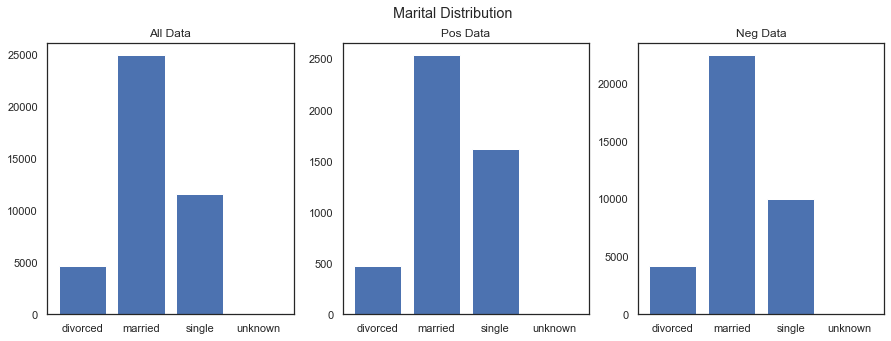

In [31]:

# Create counts for each marital type
all_marital = dict(train_df.marital.value_counts())
all_marital = collections.OrderedDict(sorted(all_marital.items()))

pos_marital = dict(pos_df.marital.value_counts())
pos_marital = collections.OrderedDict(sorted(pos_marital.items()))


neg_marital = dict(neg_df.marital.value_counts())
neg_marital = collections.OrderedDict(sorted(neg_marital.items()))


# Visualize data

fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].bar(all_marital.keys(), all_marital.values())
axs[0].set_title('All Data')

axs[1].bar(pos_marital.keys(), pos_marital.values())
axs[1].set_title('Pos Data')

axs[2].bar(neg_marital.keys(), neg_marital.values())
axs[2].set_title('Neg Data')

fig.suptitle('Marital Distribution')
plt.show()


### Compare Education Distribution

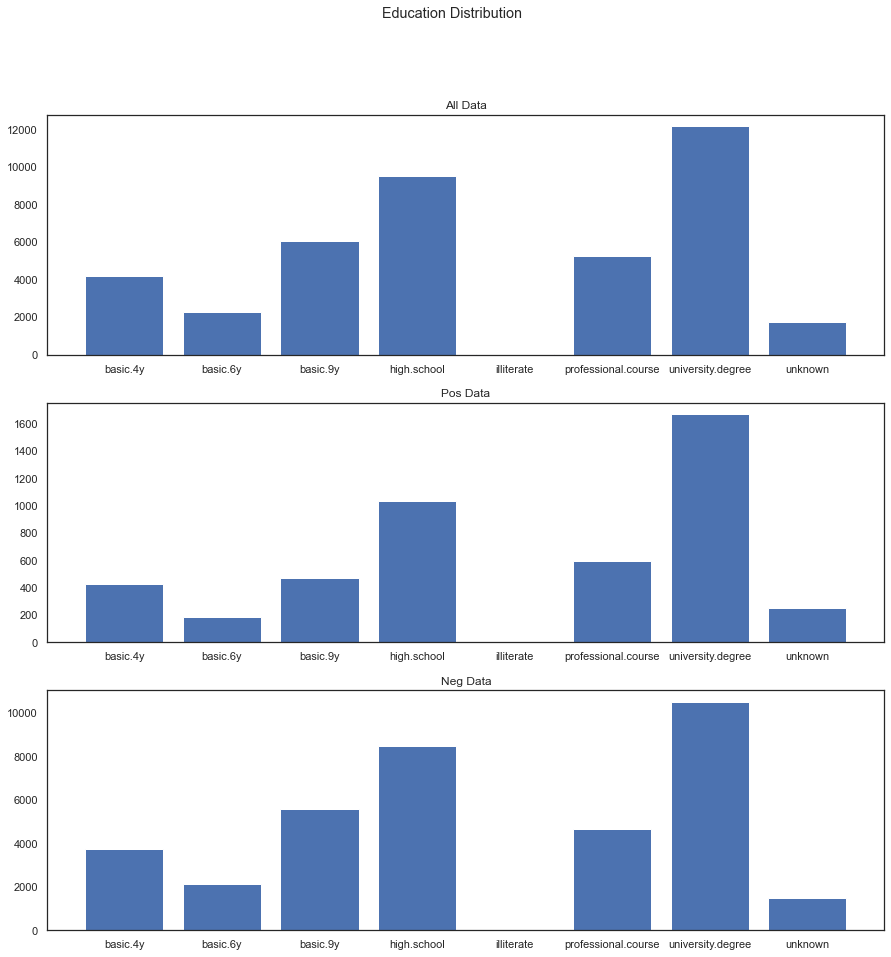

In [32]:

# Create counts for each education type
all_education = dict(train_df.education.value_counts())
all_education = collections.OrderedDict(sorted(all_education.items()))

pos_education = dict(pos_df.education.value_counts())
pos_education = collections.OrderedDict(sorted(pos_education.items()))


neg_education = dict(neg_df.education.value_counts())
neg_education = collections.OrderedDict(sorted(neg_education.items()))


# Visualize data

fig, axs = plt.subplots(3, figsize=(15,15))

axs[0].bar(all_education.keys(), all_education.values())
axs[0].set_title('All Data')

axs[1].bar(pos_education.keys(), pos_education.values())
axs[1].set_title('Pos Data')

axs[2].bar(neg_education.keys(), neg_education.values())
axs[2].set_title('Neg Data')

fig.suptitle('Education Distribution')
plt.show()


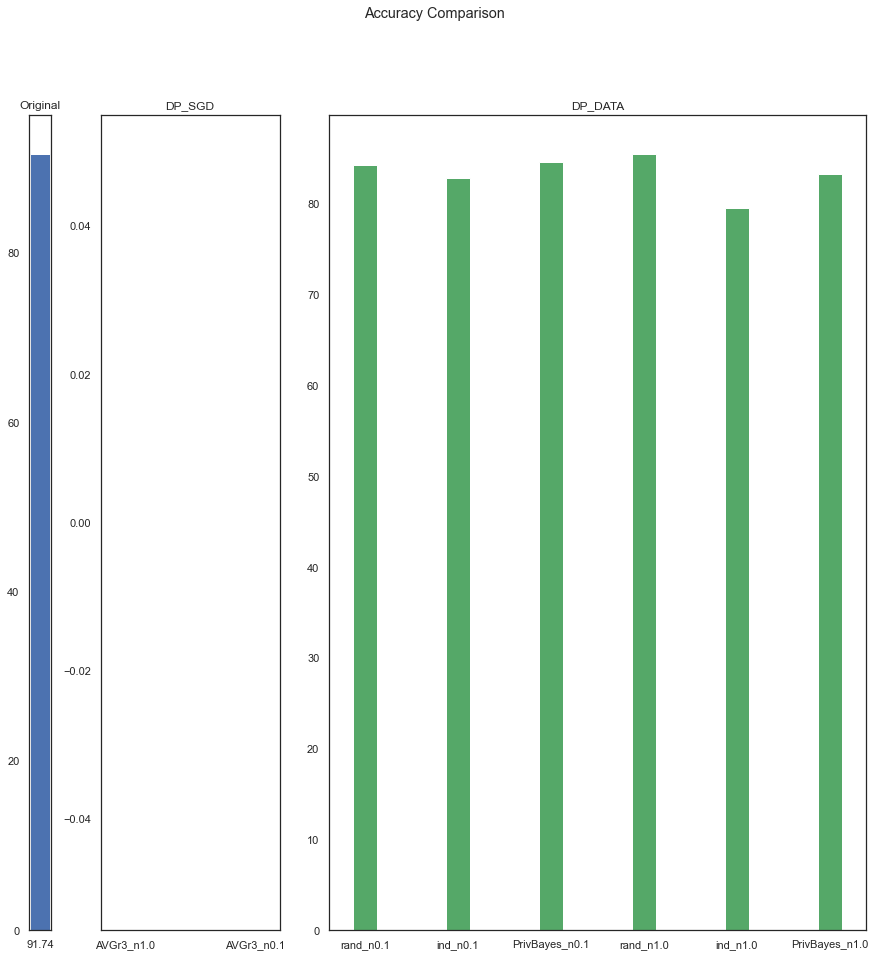

In [33]:
accuracy = {'Original_AVG-r3': 91.74,
            'DP_SGD_AVG-r3_n1.0': 0,
            'DP_SGD_AVG-r3_n0.1': 0,
            'DP_DATA_rand_n0.1': 84.29,
            'DP_DATA_ind_n0.1': 82.86,
            'DP_DATA_PrivBayes_n0.1': 84.68,
            'DP_DATA_rand_n1.0': 85.55,
            'DP_DATA_ind_n1.0': 79.53,
            'DP_DATA_PrivBayes_n1.0': 83.37}


orig = ['AVGr3']
orig_acc = [91.74]

dp_sgd = ['AVGr3_n1.0','AVGr3_n0.1']
dp_sgd_acc = [0, 0]

dp_data = ['rand_n0.1', 'ind_n0.1', 'PrivBayes_n0.1',
               'rand_n1.0', 'ind_n1.0','PrivBayes_n1.0']
dp_data_acc = [84.29, 82.86, 84.68, 85.55, 79.53, 83.37]





# Visualize data

fig, axs = plt.subplots(1,3, figsize=(15,15), gridspec_kw={'width_ratios': [0.25,2,6]})

axs[0].bar(orig, orig_acc, width = 0.25)
axs[0].set_title('Original')
axs[0].set_xticks(orig)
axs[0].set_xticklabels(orig_acc)

axs[1].bar(dp_sgd, dp_sgd_acc, color = 'b', width = 0.25) 
axs[1].set_title('DP_SGD')

axs[2].bar(dp_data, dp_data_acc, color = 'g', width = 0.25)
axs[2].set_title('DP_DATA')

fig.suptitle('Accuracy Comparison')
plt.show()


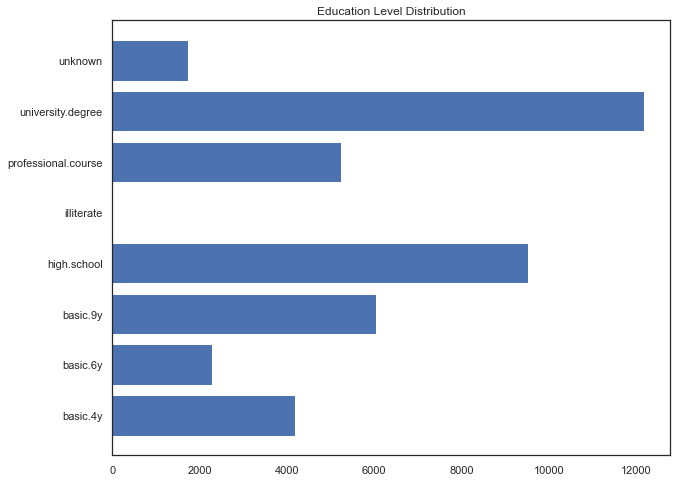

In [34]:
x_pos = [i for i, _ in enumerate(all_education.keys())]

plt.figure(figsize=(10,8))
plt.barh(x_pos, all_education.values())
plt.title("Education Level Distribution")

plt.yticks(x_pos, all_education.keys())

plt.show()


In [28]:
from pandas_profiling import ProfileReport
prof = ProfileReport(train_df)
prof.to_file(output_file='bank_profile.html')